# Just Pi

In this project, we will look into **pi** as never was pi looked at before. We want to explore it to know a little more about the irrationnal little bugger:
- How long does it take my computer to calculate 3141 digits?
- How are decimals distributed?
- What is the entropy of pi digits?

<div class="alert alert-warning" role="alert" style="margin: 40px">
<p>**Disclaimer**</p>
<p>Everything in this notebook is intended to demonstrate functionalities of Jupyter only, not to be confused with a serious analysis of Pi. Even this disclaimer box is a demonstration. You can get a box like this, for *free*, by trying Jupyter today!.</p>
</div>

## How long does it take my computer to calculate 3141 digits?

First thing we are going to do is compute some delicious **pi** digits. We use the time Magic IPython word to measure how long it takes.

In [1]:
%%time

# The following function graciously stolen and then adapted from
# https://stackoverflow.com/questions/9004789/1000-digits-of-pi-in-python
def make_pi():
    q, r, t, k, m, x = 1, 0, 1, 1, 3, 3
    j = 0
    while 1:
        j+=1
        if 4 * q + r - t < m * t:
            yield m
            q, r, t, k, m, x = 10*q, 10*(r-m*t), t, k, (10*(3*q+r))//t - 10*m, x
        else:
            q, r, t, k, m, x = q*k, (2*q+r)*x, t*x, k+1, (q*(7*k+2)+r*x)//(t*x), x+2

digits = []
for i in make_pi():
    digits.append(i)
    if len(digits)>=3141:
        break
    
print("The first 10 pi digits are {}".format(digits[:10]))

The first 10 pi digits are [3, 1, 4, 1, 5, 9, 2, 6, 5, 3]
Wall time: 612 ms


# How are decimals distributed?

Now that we have some digits, we can analyze their distribution. For this, we use matplotlib. Note that in the following cell, we use the digit variable, which was calculated in the previous cell!

Obviously we're going to use a **PIE** chart, and we'll make one slice stick out, ready to be eaten.

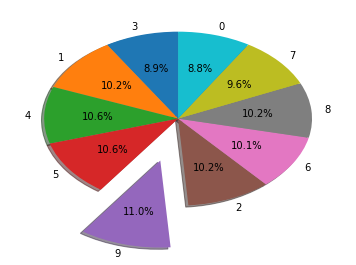

In [2]:
import collections
from matplotlib import pyplot as plt

counter=collections.Counter(digits)
labels = counter.keys()
count = counter.values()
explode = [0, 0, 0, 0, .5, 0, 0, 0, 0, 0]
plt.pie(count, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

# What is the entropy of pi digits?

For our final task, we will demonstrate how to compute the Gibbs entropy of **Pi** digits. The equation is as follows:

\begin{equation*}
S = -k_B \sum_{i} p_i ln(p_i)
\end{equation*}

In [3]:
from numpy import log

p__i = [x/len(digits) for x in count]
print("The p_i are {}".format(p__i))

kb = 1.3807e-23
S = -kb * sum([p_i*log(p_i) for p_i in p__i])
print()
print("S = {}".format(S))

The p_i are [0.08882521489971347, 0.10187838268067495, 0.10569882203120025, 0.10569882203120025, 0.11015600127347978, 0.10156001273479784, 0.10092327284304362, 0.10187838268067495, 0.09551098376313276, 0.08787010506208214]

S = 3.1758821573077424e-23


# Analysis

Well, wasn't that interesting? now we know litterally everything that there ever was and will be to know about Python. You're welcome!